# **Data Visualization of Bird Strikes between 2000 – 2011**

---


<br>

- **PROBLEM STATEMENT:** A bird strike is strictly defined as a collision between a bird and an aircraft which is in flight or on a take-off or landing roll.
Bird Strike is common and can be a significant threat to aircraft safety. For smaller aircraft, significant damage may be caused to the aircraft structure and all aircraft, especially jet-engine ones, are vulnerable to the loss
of thrust which can follow the ingestion of birds into engine air intakes. This has resulted in several fatal accidents. <br>
Bird strikes may occur during any phase of flight, but are most likely during the take-off, initial climb, approach and landing phases due to the greater numbers of birds in flight at lower levels.

<br>

 - **OBJECTIVE:**
To have a closer look the following document visually depicts the data collected on Bird Strikes by FAA between 2000-2011.


<br>

- **GIVEN**: Data Set - `Bird Strikes data.xlsx - Bird Strikes.csv`

<br>

- **PROGRAMMING LANGUAGE USED** - Python


# **Import the Libraries and the Data Set**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8-whitegrid")

In [2]:
df = pd.read_csv("/content/Bird Strikes data.xlsx - Bird Strikes.csv")

# **Data Understanding**

In [3]:
# To display the rows and columns in the data set
df.shape

(25558, 26)

In [4]:
# To Display the the first 5 rows of the Data set
df.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


In [5]:
# To display the names of the columns
df.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')

In [6]:
# To check the data types of the columns
df.dtypes

Record ID                                   int64
Aircraft: Type                             object
Airport: Name                              object
Altitude bin                               object
Aircraft: Make/Model                       object
Wildlife: Number struck                    object
Wildlife: Number Struck Actual              int64
Effect: Impact to flight                   object
FlightDate                                 object
Effect: Indicated Damage                   object
Aircraft: Number of engines?               object
Aircraft: Airline/Operator                 object
Origin State                               object
When: Phase of flight                      object
Conditions: Precipitation                  object
Remains of wildlife collected?               bool
Remains of wildlife sent to Smithsonian      bool
Remarks                                    object
Wildlife: Size                             object
Conditions: Sky                            object


In [7]:
# To check the basic stats of the data set
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Record ID,25558.0,253916.085609,38510.453382,1195.0,225783.75,248749.0,269168.75,321909.0
Wildlife: Number Struck Actual,25558.0,2.691525,12.793975,1.0,1.00,1.0,1.00,942.0
Number of people injured,25558.0,0.001056,0.050420,0.0,0.00,0.0,0.00,6.0


# **Data cleaning**



## `Dropping irrevalent columns`

- Not all the columns are important to us in the given dataframe, and hence we would drop the columns that are irrevalent to us.

- If we consider all the 26 columns present in the dataset then these features are not neccessary to obtain the model's visualtion. It does not contain any relevant information in the dataset.

In [8]:
# To store the columns into a list
df.columns.tolist()

['Record ID',
 'Aircraft: Type',
 'Airport: Name',
 'Altitude bin',
 'Aircraft: Make/Model',
 'Wildlife: Number struck',
 'Wildlife: Number Struck Actual',
 'Effect: Impact to flight',
 'FlightDate',
 'Effect: Indicated Damage',
 'Aircraft: Number of engines?',
 'Aircraft: Airline/Operator',
 'Origin State',
 'When: Phase of flight',
 'Conditions: Precipitation',
 'Remains of wildlife collected?',
 'Remains of wildlife sent to Smithsonian',
 'Remarks',
 'Wildlife: Size',
 'Conditions: Sky',
 'Wildlife: Species',
 'Pilot warned of birds or wildlife?',
 'Cost: Total $',
 'Feet above ground',
 'Number of people injured',
 'Is Aircraft Large?']

In [9]:
# columns to drop
df = df[[
    'FlightDate',
    'Aircraft: Airline/Operator',
    'Airport: Name',
    'Cost: Total $',
    'When: Phase of flight',
    'Feet above ground',
    'Effect: Impact to flight',
    'Pilot warned of birds or wildlife?'
]].copy()

In [10]:
df

,FlightDate,Aircraft: Airline/Operator,Airport: Name,Cost: Total $,When: Phase of flight,Feet above ground,Effect: Impact to flight,Pilot warned of birds or wildlife?
0,11/23/00 0:00,US AIRWAYS*,LAGUARDIA NY,"30,736",Climb,"1,500",Engine Shut Down,N
1,7/25/01 0:00,AMERICAN AIRLINES,DALLAS/FORT WORTH INTL ARPT,0,Landing Roll,0,NaN,Y
2,9/14/01 0:00,BUSINESS,LAKEFRONT AIRPORT,0,Approach,50,NaN,N
3,9/5/02 0:00,ALASKA AIRLINES,SEATTLE-TACOMA INTL,0,Climb,50,Precautionary Landing,Y
4,6/23/03 0:00,COMAIR AIRLINES,NORFOLK INTL,0,Approach,50,NaN,N
...,...,...,...,...,...,...,...,...
25553,12/30/11 0:00,SKYWEST AIRLINES,REDDING MUNICIPAL,0,Approach,"1,500",NaN,N
25554,12/30/11 0:00,US AIRWAYS,ORLANDO INTL,0,Landing Roll,0,NaN,Y
25555,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
25556,12/31/11 0:00,DELTA AIR LINES,DETROIT METRO WAYNE COUNTY ARPT,0,Landing Roll,0,NaN,Y


## `Changing the datatype`

- After removing the irrelavant columns, we need to ensure the data types for the columns as it should be. <br>
Checking the datatypes of the revised columns.

- changing the `dtype` of the columns wherever neccesary.

In [11]:
# Before changing the dtpes
df.dtypes

FlightDate                            object
Aircraft: Airline/Operator            object
Airport: Name                         object
Cost: Total $                         object
When: Phase of flight                 object
Feet above ground                     object
Effect: Impact to flight              object
Pilot warned of birds or wildlife?    object
dtype: object

In [16]:
df['FlightDate']=pd.to_datetime(df['FlightDate'],format="YYYY/MM/DD")

In [17]:
df['Cost: Total $'] = df['Cost: Total $'].str.replace(',', '')

In [18]:
df['Cost: Total $']= df['Cost: Total $'].astype('int')

In [19]:
# After changing the dtypes
df.dtypes

FlightDate                            datetime64[ns]
Aircraft: Airline/Operator                    object
Airport: Name                                 object
Cost: Total $                                  int64
When: Phase of flight                         object
Feet above ground                             object
Effect: Impact to flight                      object
Pilot warned of birds or wildlife?            object
dtype: object

In [20]:
df

,FlightDate,Aircraft: Airline/Operator,Airport: Name,Cost: Total $,When: Phase of flight,Feet above ground,Effect: Impact to flight,Pilot warned of birds or wildlife?
0,2000-11-23,US AIRWAYS*,LAGUARDIA NY,30736,Climb,"1,500",Engine Shut Down,N
1,2001-07-25,AMERICAN AIRLINES,DALLAS/FORT WORTH INTL ARPT,0,Landing Roll,0,NaN,Y
2,2001-09-14,BUSINESS,LAKEFRONT AIRPORT,0,Approach,50,NaN,N
3,2002-09-05,ALASKA AIRLINES,SEATTLE-TACOMA INTL,0,Climb,50,Precautionary Landing,Y
4,2003-06-23,COMAIR AIRLINES,NORFOLK INTL,0,Approach,50,NaN,N
...,...,...,...,...,...,...,...,...
25553,2011-12-30,SKYWEST AIRLINES,REDDING MUNICIPAL,0,Approach,"1,500",NaN,N
25554,2011-12-30,US AIRWAYS,ORLANDO INTL,0,Landing Roll,0,NaN,Y
25555,NaT,NaN,NaN,0,NaN,NaN,NaN,NaN
25556,2011-12-31,DELTA AIR LINES,DETROIT METRO WAYNE COUNTY ARPT,0,Landing Roll,0,NaN,Y


## `Dropping the Null/NaN or missing values`

- There are many values which are missing, in the dataset these values are represented as `NaN`.

- For proper visualisation of the dataset I will be dropping NaN values.

In [21]:
# Before Dropping
df.shape

(25558, 8)

In [22]:
# is na tells us every single rown and column it'll tell us if there is null values
df.isna().sum()

FlightDate                              129
Aircraft: Airline/Operator              129
Airport: Name                           129
Cost: Total $                             0
When: Phase of flight                   129
Feet above ground                       129
Effect: Impact to flight              23480
Pilot warned of birds or wildlife?      129
dtype: int64

In [23]:
# To drop NaN values --- rows
df = df.dropna()

In [24]:
# After Dropping
df.shape

(2078, 8)

## `Creating New columns`

- Creating new columns for easier visualisation.



In [25]:
df['month'] = df['FlightDate'].dt.month
df['year'] = df['FlightDate'].dt.year

<ipython-input-25-ec4c94d2ec6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['FlightDate'].dt.month
<ipython-input-25-ec4c94d2ec6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['FlightDate'].dt.year


In [26]:
df

,FlightDate,Aircraft: Airline/Operator,Airport: Name,Cost: Total $,When: Phase of flight,Feet above ground,Effect: Impact to flight,Pilot warned of birds or wildlife?,month,year
0,2000-11-23,US AIRWAYS*,LAGUARDIA NY,30736,Climb,"1,500",Engine Shut Down,N,11,2000
3,2002-09-05,ALASKA AIRLINES,SEATTLE-TACOMA INTL,0,Climb,50,Precautionary Landing,Y,9,2002
6,2003-08-17,BUSINESS,NEW CASTLE COUNTY,1481711,Climb,150,Other,N,8,2003
7,2006-03-01,UNITED AIRLINES,WASHINGTON DULLES INTL ARPT,1483141,Approach,100,Other,Y,3,2006
8,2000-01-06,AIRTRAN AIRWAYS,ATLANTA INTL,0,Take-off run,0,Aborted Take-off,N,1,2000
...,...,...,...,...,...,...,...,...,...,...
25485,2011-12-03,XTRA AIRWAYS,PUNTA GORDA ARPT,0,Landing Roll,0,Engine Shut Down,N,12,2011
25507,2011-12-08,AEROMEXICO,SACRAMENTO INTL,0,Approach,"2,200",Other,Y,12,2011
25517,2011-12-14,DELTA AIR LINES,SALT LAKE CITY INTL,0,Take-off run,0,Aborted Take-off,Y,12,2011
25527,2011-12-17,SKYWEST AIRLINES,SAN FRANCISCO INTL ARPT,0,Take-off run,0,Aborted Take-off,N,12,2011


# **Data Visualisation**


In [27]:
df

,FlightDate,Aircraft: Airline/Operator,Airport: Name,Cost: Total $,When: Phase of flight,Feet above ground,Effect: Impact to flight,Pilot warned of birds or wildlife?,month,year
0,2000-11-23,US AIRWAYS*,LAGUARDIA NY,30736,Climb,"1,500",Engine Shut Down,N,11,2000
3,2002-09-05,ALASKA AIRLINES,SEATTLE-TACOMA INTL,0,Climb,50,Precautionary Landing,Y,9,2002
6,2003-08-17,BUSINESS,NEW CASTLE COUNTY,1481711,Climb,150,Other,N,8,2003
7,2006-03-01,UNITED AIRLINES,WASHINGTON DULLES INTL ARPT,1483141,Approach,100,Other,Y,3,2006
8,2000-01-06,AIRTRAN AIRWAYS,ATLANTA INTL,0,Take-off run,0,Aborted Take-off,N,1,2000
...,...,...,...,...,...,...,...,...,...,...
25485,2011-12-03,XTRA AIRWAYS,PUNTA GORDA ARPT,0,Landing Roll,0,Engine Shut Down,N,12,2011
25507,2011-12-08,AEROMEXICO,SACRAMENTO INTL,0,Approach,"2,200",Other,Y,12,2011
25517,2011-12-14,DELTA AIR LINES,SALT LAKE CITY INTL,0,Take-off run,0,Aborted Take-off,Y,12,2011
25527,2011-12-17,SKYWEST AIRLINES,SAN FRANCISCO INTL ARPT,0,Take-off run,0,Aborted Take-off,N,12,2011


## `Yearly Analysis & Bird Strikes in the US`

<ipython-input-28-c7fff6d50846>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=df, palette='viridis')


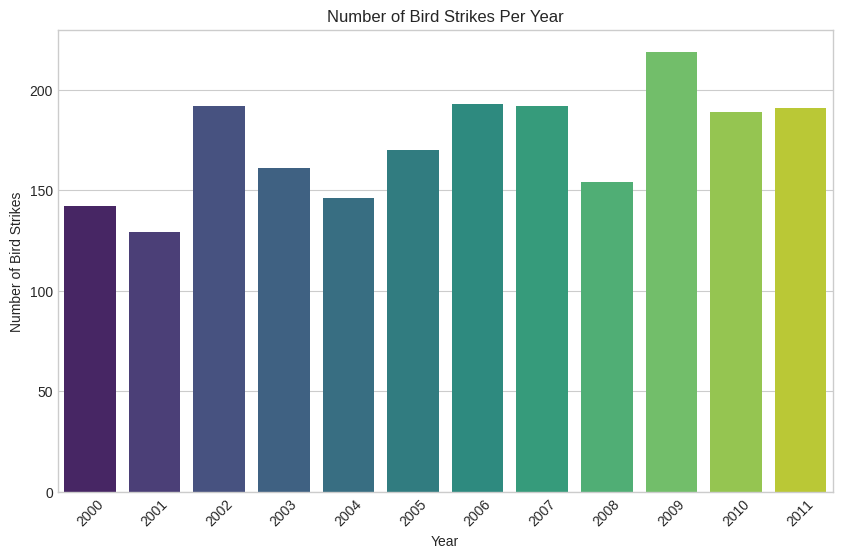

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df, palette='viridis')
plt.title('Number of Bird Strikes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()

## `Top 10 US Airlines in terms of having encountered bird strikes`

<ipython-input-29-6fed4324d285>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_airlines.values, y=top_airlines.index, palette='bwr')


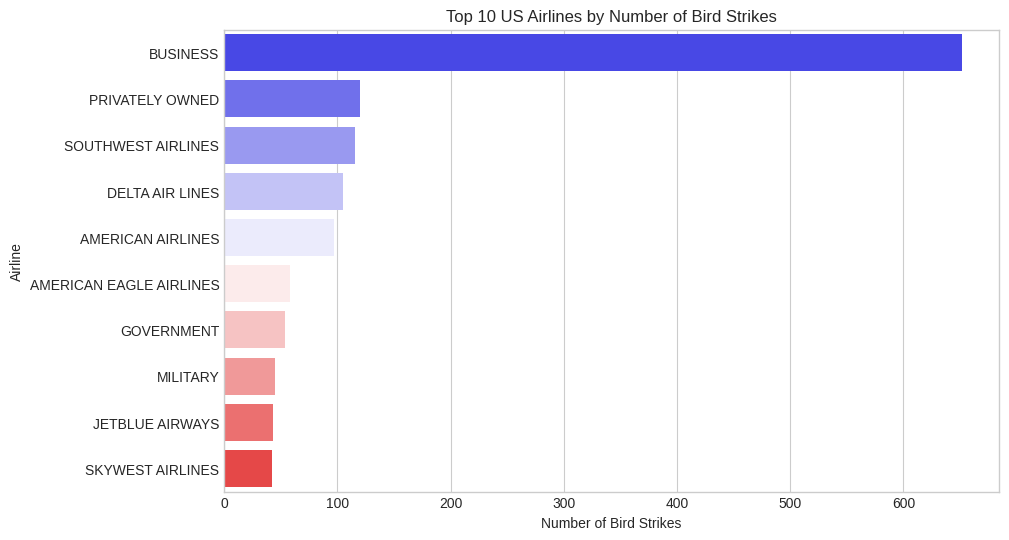

In [29]:
# Plot the top 10 airlines with the most bird strikes
top_airlines = df['Aircraft: Airline/Operator'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_airlines.values, y=top_airlines.index, palette='bwr')
plt.title('Top 10 US Airlines by Number of Bird Strikes')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airline')
plt.show()


## `Airports with most incidents of bird strikes – Top 50`




In [30]:
df['Airport: Name'].value_counts().head(50).to_dict()

d1= {'SACRAMENTO INTL': 44,
 'JOHN F KENNEDY INTL': 38,
 'DALLAS/FORT WORTH INTL ARPT': 33,
 'ORLANDO INTL': 32,
 'ORLANDO SANFORD INTL AIRPORT': 31,
 'SALT LAKE CITY INTL': 30,
 'ATLANTA INTL': 26,
 'FORT LAUDERDALE/HOLLYWOOD INTL': 26,
 'DAYTONA BEACH INTL': 24,
 'PORTLAND INTL (OR)': 24,
 'KANSAS CITY INTL': 23,
 'CINCINNATI/NORTHERN KENTUCKY INTL ARPT': 23,
 'NEWARK LIBERTY INTL ARPT': 22,
 'DENVER INTL AIRPORT': 22,
 'LAMBERT-ST LOUIS INTL': 22,
 'NASHVILLE INTL': 21,
 'METRO OAKLAND INTL': 20,
 'MIAMI INTL': 19,
 'BARKSDALE AIR FORCE BASE ARPT': 19,
 'RICHARD LLOYD JONES JR ARPT': 19,
 'LOGAN INTL': 19,
 'BIRMINGHAM-SHUTTLESWORTH INTL': 19,
 'TETERBORO AIRPORT': 19,
 "CHICAGO O'HARE INTL ARPT": 18,
 'CHARLOTTE/DOUGLAS INTL ARPT': 18,
 'SAN FRANCISCO INTL ARPT': 17,
 'MINNEAPOLIS-ST PAUL INTL': 17,
 'WASHINGTON DULLES INTL ARPT': 17,
 'MINETA SAN JOSE INTL': 16,
 'LAGUARDIA NY': 16,
 'DETROIT METRO WAYNE COUNTY ARPT': 16,
 'SOUTHWEST FLORIDA INTL ARPT': 16,
 'PHILADELPHIA INTL': 15,
 'BALTIMORE WASH INTL': 15,
 'NEW ORLEANS INTL': 14,
 'GREATER PITTSBURGH': 14,
 'PORT COLUMBUS INTL': 14,
 'PHOENIX DEER VALLEY ARPT': 13,
 'CHARLESTON AFB/INTL ARPT': 13,
 'ERNEST A LOVE FIELD': 13,
 'CHICAGO MIDWAY INTL ARPT': 12,
 'GRAND FORKS INTL': 12,
 'CLEVELAND-HOPKINS INTL ARPT': 12,
 'MEMPHIS INTL': 12,
 'SHEPPARD AIR FORCE BASE': 12,
 'SAVANNAH INTL': 11,
 'MORRISTOWN MUNICIPAL ARPT': 11,
 'NORFOLK INTL': 11,
 'WESTCHESTER COUNTY ARPT': 11,
 'EPPLEY AIRFIELD': 11}

d1.keys()

dict_keys(['SACRAMENTO INTL', 'JOHN F KENNEDY INTL', 'DALLAS/FORT WORTH INTL ARPT', 'ORLANDO INTL', 'ORLANDO SANFORD INTL AIRPORT', 'SALT LAKE CITY INTL', 'ATLANTA INTL', 'FORT LAUDERDALE/HOLLYWOOD INTL', 'DAYTONA BEACH INTL', 'PORTLAND INTL (OR)', 'KANSAS CITY INTL', 'CINCINNATI/NORTHERN KENTUCKY INTL ARPT', 'NEWARK LIBERTY INTL ARPT', 'DENVER INTL AIRPORT', 'LAMBERT-ST LOUIS INTL', 'NASHVILLE INTL', 'METRO OAKLAND INTL', 'MIAMI INTL', 'BARKSDALE AIR FORCE BASE ARPT', 'RICHARD LLOYD JONES JR ARPT', 'LOGAN INTL', 'BIRMINGHAM-SHUTTLESWORTH INTL', 'TETERBORO AIRPORT', "CHICAGO O'HARE INTL ARPT", 'CHARLOTTE/DOUGLAS INTL ARPT', 'SAN FRANCISCO INTL ARPT', 'MINNEAPOLIS-ST PAUL INTL', 'WASHINGTON DULLES INTL ARPT', 'MINETA SAN JOSE INTL', 'LAGUARDIA NY', 'DETROIT METRO WAYNE COUNTY ARPT', 'SOUTHWEST FLORIDA INTL ARPT', 'PHILADELPHIA INTL', 'BALTIMORE WASH INTL', 'NEW ORLEANS INTL', 'GREATER PITTSBURGH', 'PORT COLUMBUS INTL', 'PHOENIX DEER VALLEY ARPT', 'CHARLESTON AFB/INTL ARPT', 'ERNEST A LO

In [31]:
airportnames=['SACRAMENTO', 'JOHN F KENNEDY', 'DALLAS/FORT WORTH', 'ORLANDO',
 'ORLANDO SANFORD', 'SALT LAKE CITY', 'ATLANTA', 'FORT LAUDERDALE/HOLLYWOOD',
 'DAYTONA BEACH', 'PORTLAND (OR)', 'KANSAS CITY', 'CINCINNATI/NORTHERN KENTUCKY',
 'NEWARK LIBERTY', 'DENVER', 'LAMBERT-ST LOUIS', 'NASHVILLE', 'METRO OAKLAND',
 'MIAMI', 'BARKSDALE AIR FORCE BASE', 'RICHARD LLOYD JONES JR', 'LOGAN', 'BIRMINGHAM-SHUTTLESWORTH',
 'TETERBORO', "CHICAGO O'HARE", 'CHARLOTTE/DOUGLAS', 'SAN FRANCISCO',
 'MINNEAPOLIS-ST PAUL', 'WASHINGTON DULLES', 'MINETA SAN JOSE',
 'LAGUARDIA NY', 'DETROIT METRO WAYNE COUNTY', 'SOUTHWEST FLORIDA', 'PHILADELPHIA',
 'BALTIMORE WASH', 'NEW ORLEANS', 'GREATER PITTSBURGH', 'PORT COLUMBUS', 'PHOENIX DEER VALLEY',
 'CHARLESTON AFB', 'ERNEST A LOVE FIELD', 'CHICAGO MIDWAY', 'GRAND FORKS', 'CLEVELAND-HOPKINS',
 'MEMPHIS', 'SHEPPARD AIR FORCE BASE',
 'SAVANNAH', 'MORRISTOWN MUNICIPAL', 'NORFOLK', 'WESTCHESTER COUNTY', 'EPPLEY AIRFIELD']

<ipython-input-32-ebf94c8d438f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_airports.values, y=top_airports.index, palette='viridis')


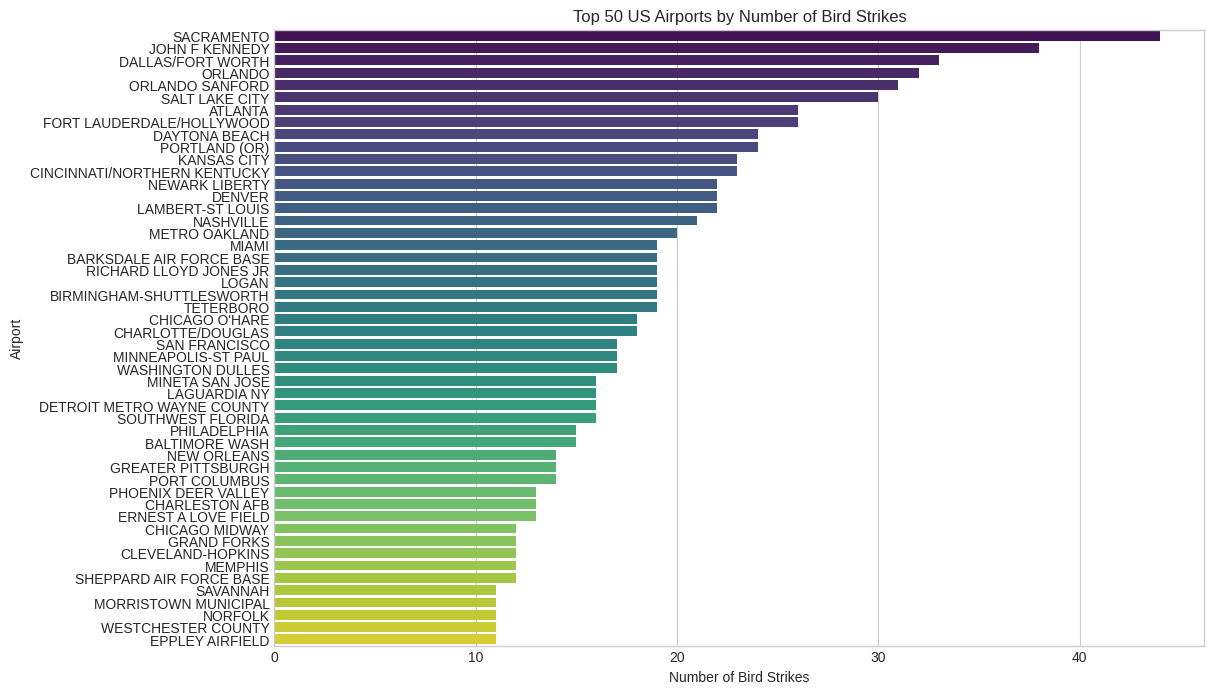

In [32]:
# Plot the top 50 airports with the most bird strikes
top_airports = df['Airport: Name'].value_counts().head(50)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_airports.values, y=top_airports.index, palette='viridis')

plt.yticks(ticks = top_airports.index, labels= airportnames)
plt.title('Top 50 US Airports by Number of Bird Strikes')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airport')
plt.show()


## `Yearly Cost Incurred due to Bird Strikes.`

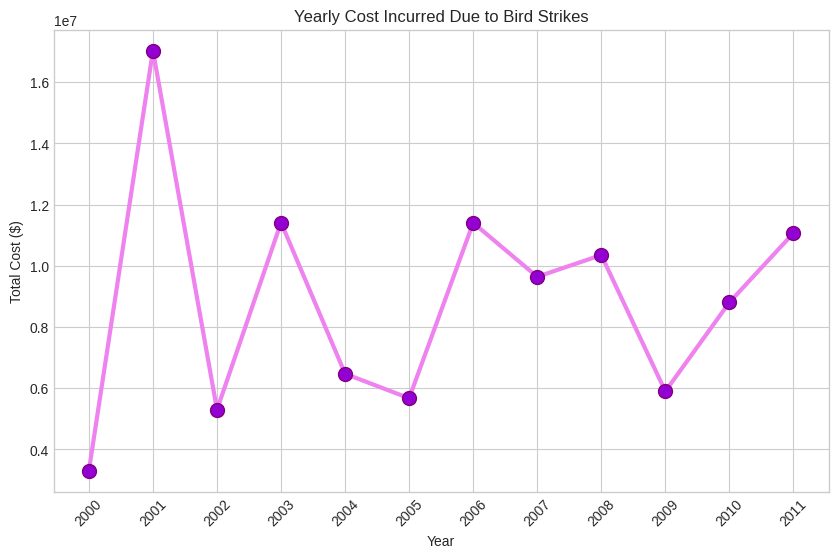

In [33]:
# Calculating the Yearly cost
cost_per_year = df.groupby('year')['Cost: Total $'].sum()

#creating a dataframe to store the yearly cost
data = pd.DataFrame(cost_per_year, columns = ['Cost: Total $'])
data.reset_index(inplace = True)
data

# Plot the total cost per year
year = data['year']
total_cost = data['Cost: Total $']

plt.figure(figsize=(10, 6))
plt.plot(year,total_cost,linewidth = 3, marker='o',markeredgecolor ="purple", mfc = 'darkviolet',markersize = 10, color = 'violet')


plt.xticks(ticks = data['year'])
plt.title('Yearly Cost Incurred Due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Total Cost ($)')
plt.xticks(rotation=45)
plt.show()


## `When Do Most Bird Strikes Occur?`
Phase of Flight at the Time of Strike


<ipython-input-34-1f43331709c0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='When: Phase of flight', data=df, palette='winter')


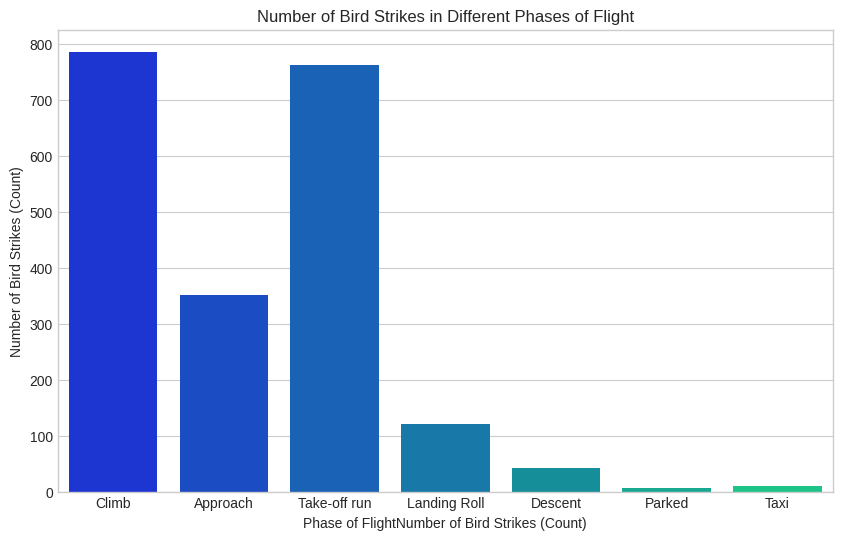

In [34]:
# Plot the number of bird strikes in different phases of flight
plt.figure(figsize=(10, 6))

sns.countplot(x='When: Phase of flight', data=df, palette='winter')

plt.title('Number of Bird Strikes in Different Phases of Flight')
plt.xlabel('Phase of FlightNumber of Bird Strikes (Count)')
plt.ylabel('Number of Bird Strikes (Count)')
plt.show()


## `Altitude of aeroplanes at the time of strike`

In [35]:
df['Feet above ground'] = df['Feet above ground'].str.replace(',', '')

<ipython-input-35-35feb2e4ae24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Feet above ground'] = df['Feet above ground'].str.replace(',', '')


In [36]:
df['Feet above ground']= df['Feet above ground'].astype('int')

<ipython-input-36-a5b195eb63bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Feet above ground']= df['Feet above ground'].astype('int')


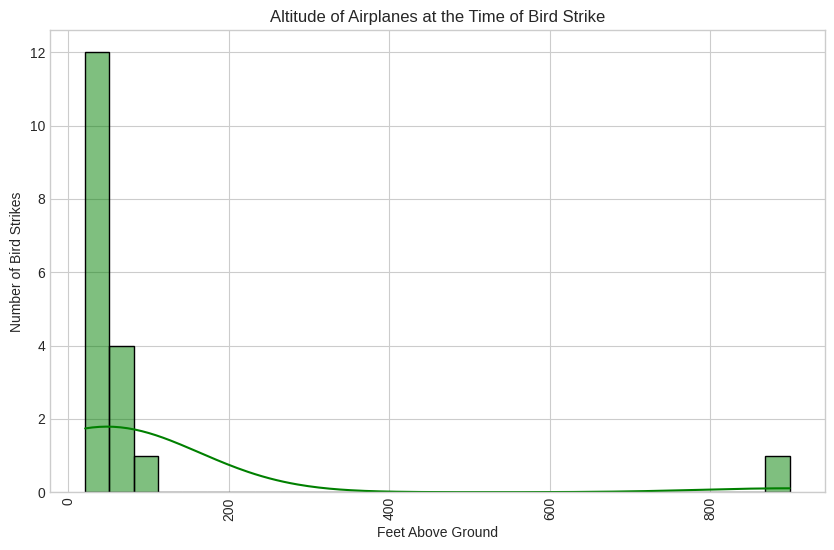

In [37]:
# Filter out the altitudes where the count is not equal to 1 and not less than or equal to 20
value =  df['Feet above ground'].value_counts()
d2 = value[(value != 1) & (value > 20)]

# Creating a data frame to store filtered values
filtered = pd.DataFrame(d2)
filtered.reset_index(inplace = True)
filtered

# Plot the distribution of altitudes at the time of strike
plt.figure(figsize=(10, 6))
sns.histplot(data = filtered, x=filtered['count'],kde=True, color='green')

plt.xticks(rotation=90, label = filtered['Feet above ground'])
plt.title('Altitude of Airplanes at the Time of Bird Strike')
plt.xlabel('Feet Above Ground')
plt.ylabel('Number of Bird Strikes')
plt.show()

## `Average Altitude of the aeroplanes in different phases at the time of strike`

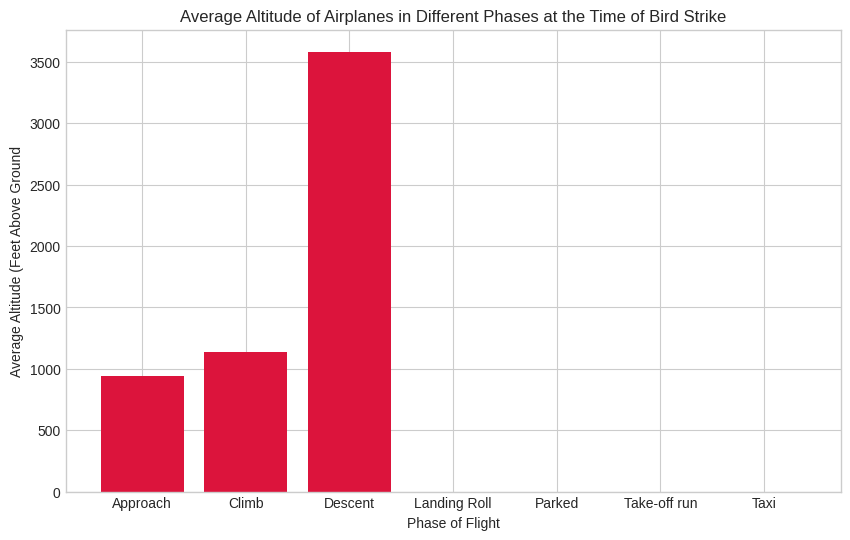

In [38]:
# Plot the average altitude in different phases of flight
average_altitude = df.groupby('When: Phase of flight')['Feet above ground'].mean()

plt.figure(figsize=(10, 6))
plt.bar(average_altitude.index,average_altitude.values,color ="crimson")
plt.title('Average Altitude of Airplanes in Different Phases at the Time of Bird Strike')
plt.xlabel('Phase of Flight')
plt.ylabel('Average Altitude (Feet Above Ground')
plt.show()


## `Effect of Bird Strikes on Flight`

<ipython-input-39-2da28f37d169>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Effect: Impact to flight', data=df, palette='cool')


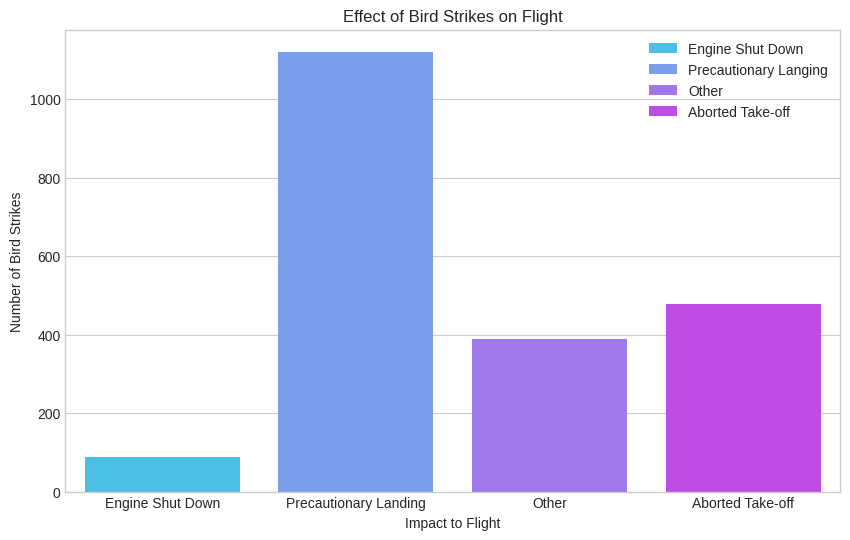

In [39]:
# Plot the effect of bird strikes on flight
plt.figure(figsize=(10, 6))

sns.countplot(x='Effect: Impact to flight', data=df, palette='cool')

plt.legend(['Engine Shut Down','Precautionary Langing','Other','Aborted Take-off'])
plt.title('Effect of Bird Strikes on Flight')
plt.xlabel('Impact to Flight')
plt.ylabel('Number of Bird Strikes')
plt.show()

## `Were Pilots Informed? & Prior Warning and Effect of Strike Relation`

<ipython-input-40-84d6d82404f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pilot warned of birds or wildlife?', data=df, palette='hot')


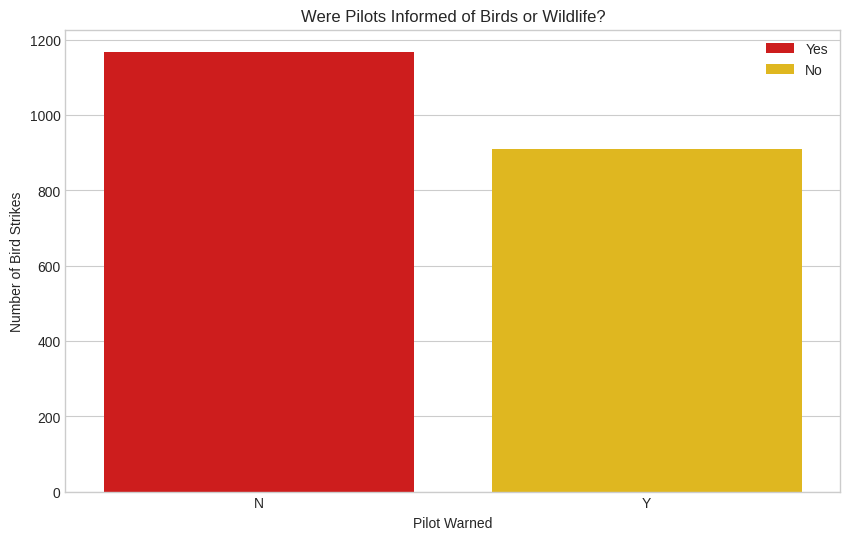

In [40]:
# Plot whether pilots were warned of birds or wildlife
plt.figure(figsize=(10, 6))
sns.countplot(x='Pilot warned of birds or wildlife?', data=df, palette='hot')

plt.legend(['Yes','No'])
plt.title('Were Pilots Informed of Birds or Wildlife?')
plt.xlabel('Pilot Warned')
plt.ylabel('Number of Bird Strikes')
plt.show()


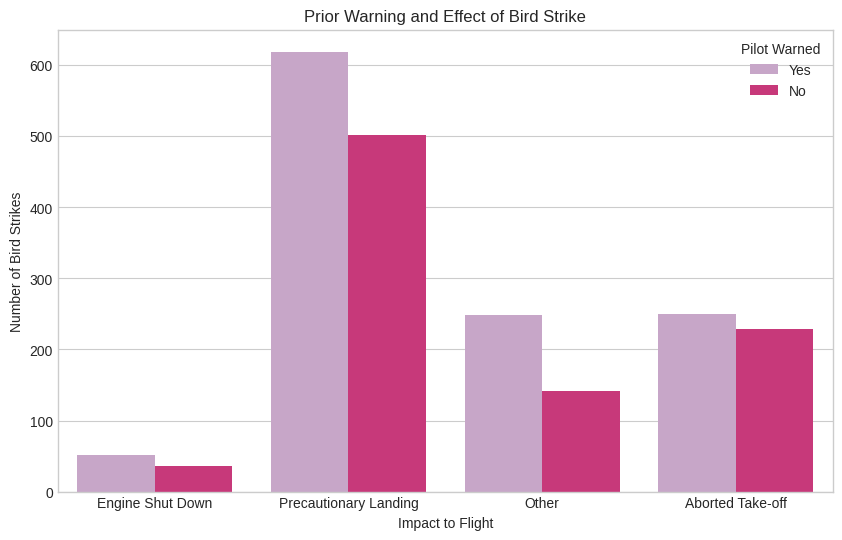

In [41]:
# Plot the relation between prior warning and effect of strike
plt.figure(figsize=(10, 6))
sns.countplot(x='Effect: Impact to flight', hue='Pilot warned of birds or wildlife?', data=df, palette='PuRd')
plt.title('Prior Warning and Effect of Bird Strike')
plt.xlabel('Impact to Flight')
plt.ylabel('Number of Bird Strikes')
plt.legend(['Yes','No'],title='Pilot Warned')
plt.show()